## DESCRIPTIVE STATISTICS

In [1]:
import pandas as pd

In [2]:
basic = pd.read_csv('basic_db.gz')

In [3]:
basic.head()

,business_id,date,stars,user_id
0,0W4lkclzZThpx3V65bVgig,2016-05-28,5,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,2016-05-28,5,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,2016-05-28,5,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,2016-05-28,5,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,2016-05-28,4,bv2nCi5Qv5vroFiqKGopiw


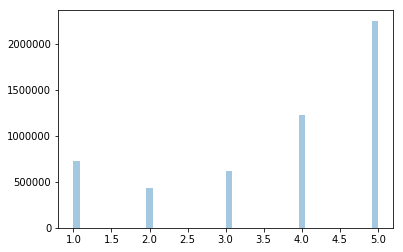

In [5]:
import seaborn as sns
sns.distplot(basic['stars'].values, kde=False)


In [7]:
pd.options.display.float_format = '{:20,.2f}'.format
basic.describe()

,stars
count,"5,261,669.00"
mean,3.73
std,1.43
min,1.00
25%,3.00
50%,4.00
75%,5.00
max,5.00


In [8]:
basic.stars.value_counts()

5    2253348
4    1223316
1     731363
3     615481
2     438161
Name: stars, dtype: int64

We face a problem of disbalanced clases

In [5]:
grps_person = basic.groupby('user_id')
reviews_person = grps_person.count().sort_values(by='business_id', ascending = False)  ## Counts of reviews per person
pd.options.display.float_format = '{:20,.2f}'.format
reviews_person.iloc[:,1].describe()

In [6]:
   # Statistics of reviews per person

count           1,326,101.00
mean                    3.97
std                    13.71
min                     1.00
25%                     1.00
50%                     1.00
75%                     3.00
max                 3,569.00
Name: date, dtype: float64

In [4]:
grps_business = basic.groupby('business_id')
reviews_business = grps_business.count().sort_values(by='stars', ascending = False)  ## Counts of reviews per business
pd.options.display.float_format = '{:20,.2f}'.format
reviews_business.iloc[:,1].describe()

count             174,567.00
mean                   30.14
std                    98.22
min                     1.00
25%                     4.00
50%                     8.00
75%                    23.00
max                 7,362.00
Name: stars, dtype: float64

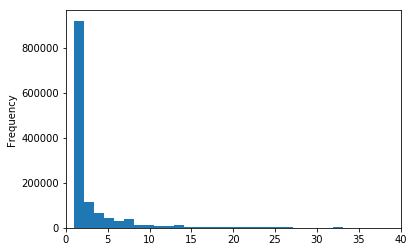

In [12]:
import matplotlib as plt

#Making an histogram to see how are the counts of reviews by user are distributed
reviews_person.iloc[:,1].plot.hist(bins = 3000, xlim=(0,40))

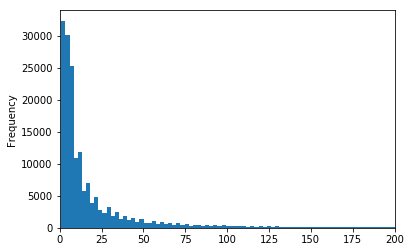

In [6]:
import matplotlib as plt

#Making an histogram to see how are the counts of reviews by business are distributed
reviews_business.iloc[:,1].plot.hist(bins = 3000, xlim=(0,200))

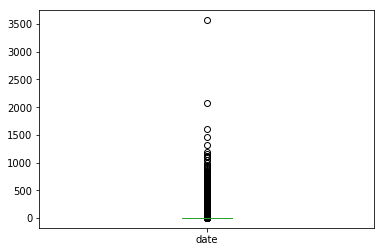

In [15]:
# Box Plot of the counts of reviews per user
reviews_person.iloc[:,1].plot.box()

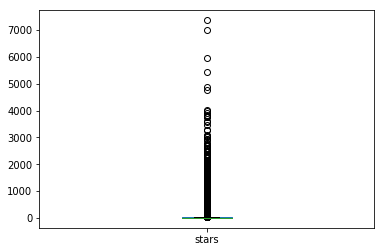

In [7]:
reviews_business.iloc[:,1].plot.box()

In [16]:
import numpy as np

# This for loop calculates the percentiles and of the counts of reviews per user. Also calculates the sum of number of reviews accumulates in actual and previous percentiles
list_quantiles = []
list_sum_reviews = []
for i in np.arange(1,101,1):
    list_quantiles.append(reviews_person.iloc[:,1].quantile(i/100))   ## Calculates percentiles over the count of reviews per person
    list_sum_reviews.append(sum(reviews_person.iloc[:,1].sort_values()[0:int(len(reviews_person.iloc[:,1])*i/100)]))   #Accumulative sum of count of reviews by percentile
    

In [17]:
import matplotlib as plt
q = np.arange(1,101,1)
percentiles_count = pd.DataFrame({'Count_Reviews':list_quantiles, 'Percentile':q, 'Sum_reviews':list_sum_reviews})
percentiles_count.head(100)

,Count_Reviews,Percentile,Sum_reviews
0,1.00,1,13261
1,1.00,2,26522
2,1.00,3,39783
3,1.00,4,53044
4,1.00,5,66305
5,1.00,6,79566
6,1.00,7,92827
7,1.00,8,106088
8,1.00,9,119349
9,1.00,10,132610


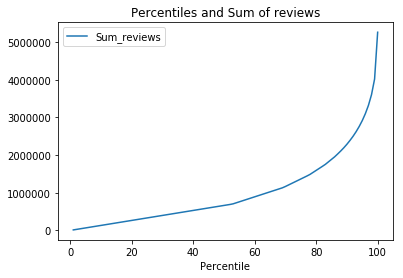

In [19]:
percentiles_count.plot(x='Percentile',y='Sum_reviews', title='Percentiles and Sum of reviews')

In [20]:
reviews_person.iloc[:,1].quantile(.999)

167.0

Similarly for business

In [8]:
import numpy as np
import matplotlib as plt
import time

start_time = time.time()

# This for loop calculates the percentiles and of the counts of reviews per business. Also calculates the sum of number of reviews accumulates in actual and previous percentiles
list_quantiles_business = []
list_sum_reviews_business = []
for i in np.arange(1,101,1):
    list_quantiles_business.append(reviews_business.iloc[:,1].quantile(i/100))   ## Calculates percentiles over the count of reviews per person
    list_sum_reviews_business.append(sum(reviews_business.iloc[:,1].sort_values()[0:int(len(reviews_business.iloc[:,1])*i/100)]))   #Accumulative sum of count of reviews by percentile


q = np.arange(1,101,1)
percentiles_count_business = pd.DataFrame({'Count_Reviews':list_quantiles_business, 'Percentile':q, 'Sum_reviews':list_sum_reviews_business})
percentiles_count_business.head(100)

print(time.time() - start_time)

2.5418381690979004


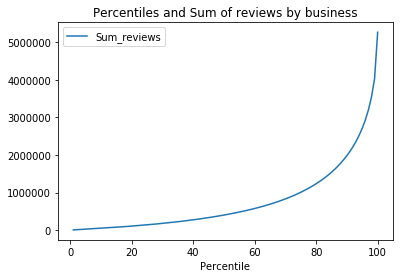

In [13]:
percentiles_count_business.plot(x='Percentile',y='Sum_reviews', title='Percentiles and Sum of reviews by business')

In [10]:
percentiles_count_business

,Count_Reviews,Percentile,Sum_reviews
0,3.00,1,5191
1,3.00,2,10429
2,3.00,3,15667
3,3.00,4,20902
4,3.00,5,26140
5,3.00,6,31378
6,3.00,7,36613
7,3.00,8,41851
8,3.00,9,47089
9,3.00,10,52324


How is the distribution of the 99th percentile?

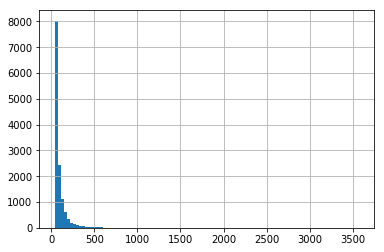

In [22]:
reviews_person.iloc[:,1].sort_values()[int(len(reviews_person.iloc[:,1])*99/100):len(reviews_person)].hist(bins = 100)


How are the statistics of the 99th percentile?

In [26]:
percentile_99 = reviews_person.iloc[:,1].sort_values()[int(len(reviews_person.iloc[:,1])*99/100):len(reviews_person)]  # Takes the 99th percentile
percentile_99.describe()


count              13,262.00
mean                   93.72
std                    93.17
min                    41.00
25%                    50.00
50%                    65.00
75%                   101.00
max                 3,569.00
Name: date, dtype: float64

How is the distribution by stars of the 99th percentile?

In [32]:
percentile_99_stars = pd.DataFrame()

for i in percentile_99.sample(frac = 0.1, replace = False).index:  ### Random pick 1,320 users
    percentile_99_stars = percentile_99_stars.append(grps_person.get_group(i))
    

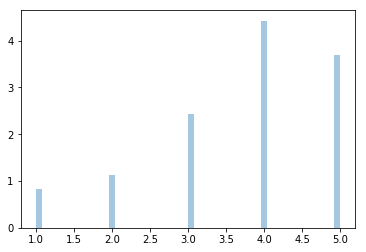

In [33]:
import seaborn as sns
sns.distplot(percentile_99_stars['stars'].values, kde=False,norm_hist=True)


The distribution is different than the whole sample.

Specifically, how the distribution of stars are for the users with the highest number of reviews?

In [28]:
percentile_99_stars = pd.DataFrame()
for i in percentile_99_9.index[12000:len(percentile_99.index)-1]:
    percentile_99_stars = percentile_99_stars.append(grps_person.get_group(i))
    

Distribution of Stars of the top 1,262 reviewers


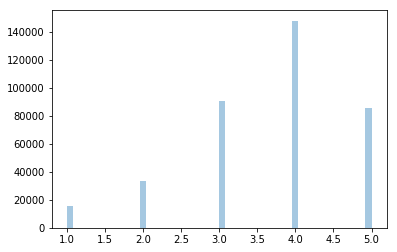

In [33]:
print('Distribution of Stars of the top 1,262 reviewers')
sns.distplot(percentile_99_stars['stars'].values, kde=False)


Analyzing counts by User - Business

In [34]:
user_business = basic.groupby(by=['user_id','business_id'])

In [35]:
sum(user_business['date'].count().values > 1)

2

There are only 2 reviews that given by the same user for a business

Given the noise that this unbalanced data (in terms of review counts by users) can have, and in line with Bo Pang and Lillian Lee and Shivakumar Vaithyanathan (2002) we decide to keep at most 41 reviews per user (which is the 99th percentile).

In [6]:
basic = basic[basic['stars'] != 3]
grps_person = basic.groupby('user_id')
reviews_person = grps_person.count().sort_values(by='business_id', ascending = False)  ## Counts of reviews per person
pd.options.display.float_format = '{:20,.2f}'.format
reviews_person.iloc[:,1].describe()

count           1,290,392.00
mean                    3.60
std                    10.66
min                     1.00
25%                     1.00
50%                     1.00
75%                     3.00
max                 1,645.00
Name: date, dtype: float64

In [7]:
import os
users_large_num_reviews = pd.Series(reviews_person[reviews_person['stars']>41].index)
users_large_num_reviews.to_csv('/Users/jd/OneDrive/Carnegie Mellon/Materias/Machine Learning/Project/users_large_num_reviews.csv')


Reading the data

In [10]:
import pandas as pd
users_to_random = pd.read_csv('users_large_num_reviews.csv', header = None)[1]
print(len(users_to_random))
users_to_random.head(5)

10085


0    CxDOIDnH8gp9KXzpBHJYXw
1    DK57YibC5ShBmqQl97CKog
2    bLbSNkLggFnqwNNzzq-Ijw
3    PKEzKWv_FktMm2mGPjwd0Q
4    cMEtAiW60I5wE_vLfTxoJQ
Name: 1, dtype: object

In [1]:
import pandas as pd
data = pd.read_csv('review_db.gz')
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,business_id,stars,text,user_id
0,0W4lkclzZThpx3V65bVgig,5,"Love the staff, love the meat, love the place....",bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...,bv2nCi5Qv5vroFiqKGopiw


We are not using datapoints with 3 stars, because we take them as neutral. We get rid of them to decrease data size.

In [2]:
set(data['stars'])

{1,
 '1',
 2,
 '2',
 3,
 '3',
 4,
 '4',
 5,
 '5',
 'QRn8ELZmvP8S4evnSRU9bQ',
 'aZs_IrhA7rvuLBumVhJjCw'}

In [3]:
data = data.drop(data[data['stars']=='QRn8ELZmvP8S4evnSRU9bQ'].index)
data = data.drop(data[data['stars']=='aZs_IrhA7rvuLBumVhJjCw'].index)
data['stars'][data['stars']=='1'] = 1
data['stars'][data['stars']=='2'] = 2
data['stars'][data['stars']=='3'] = 3
data['stars'][data['stars']=='4'] = 4
data['stars'][data['stars']=='5'] = 5
data = data[data['stars'] != 3]
print(set(data['stars']))
data = data.filter(items=['stars','text','user_id'])

{1, 2, 4, 5}


In [12]:
users_to_random.name='user_id'
users_to_random = users_to_random.to_frame()

Merges the users to random reviews with all the data

In [13]:
import time
start_time = time.time()
start_time = time.time()
datos_user_lage_review = data.merge(users_to_random, how='inner', on='user_id',right_index=True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.5528178215026855 seconds ---


In [14]:
len(datos_user_lage_review)

879671

Takes 41 random reviews from users with more than 41 reviews and store it on sample_users

In [15]:
import time
start_time = time.time()

sample_users = pd.DataFrame()
for i in range(len(users_to_random)):
    sample_users = sample_users.append(datos_user_lage_review[datos_user_lage_review['user_id'] == users_to_random.iloc[i,0]].sample(n=41))

print("--- %s seconds ---" % (time.time() - start_time))


--- 1095.7776849269867 seconds ---


In [16]:
sample_users.head()

,stars,text,user_id
3482095,4,"I don't frequent bookstores, personally I thin...",CxDOIDnH8gp9KXzpBHJYXw
1944261,2,Maybe I should had order a pho with no topping...,CxDOIDnH8gp9KXzpBHJYXw
3198684,4,Why do I have to make decisions all the time?!...,CxDOIDnH8gp9KXzpBHJYXw
2265877,4,Finally a brand new theatre in Markham area! \...,CxDOIDnH8gp9KXzpBHJYXw
1803108,2,Dropped by Go For Tea on a rainny Saturday. \r...,CxDOIDnH8gp9KXzpBHJYXw


In [18]:
sample_users.to_csv('/Users/jd/OneDrive/Carnegie Mellon/Materias/Machine Learning/Project/random_sample_rev_users_large.csv')


In [5]:
sample_users = pd.read_csv('random_sample_rev_users_large.csv')

In [8]:
set(sample_users['stars'])
sample_users = sample_users[sample_users['stars'] != 3]

This gets rid from the big dataset of the users with high num of reviews

In [15]:
import time
start_time = time.time()
data=data.drop(datos_user_lage_review.index)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.8863489627838135 seconds ---


In [16]:
data['stars'].describe()

count     3766517
unique          4
top             5
freq      1932100
Name: stars, dtype: int64

In [17]:
data = data.append(sample_users)

In [19]:
data['stars'].describe()

count     4176007
unique          4
top             5
freq      2090906
Name: stars, dtype: int64

In [24]:
data=data.filter(items=['stars','text','user_id'])
data.head()

,stars,text,user_id
0,5,"Love the staff, love the meat, love the place....",bv2nCi5Qv5vroFiqKGopiw
1,5,Super simple place but amazing nonetheless. It...,bv2nCi5Qv5vroFiqKGopiw
2,5,Small unassuming place that changes their menu...,bv2nCi5Qv5vroFiqKGopiw
3,5,Lester's is located in a beautiful neighborhoo...,bv2nCi5Qv5vroFiqKGopiw
4,4,Love coming here. Yes the place always needs t...,bv2nCi5Qv5vroFiqKGopiw


In [26]:
len(data)

4176007

In [27]:
data.to_csv('/Users/jd/OneDrive/Carnegie Mellon/Materias/Machine Learning/Project/Full_data_before_random.csv')

In [108]:
data_before_random = pd.read_csv('Full_data_before_random.csv')

In [109]:
len(data_before_random)

4176007

In [28]:
data = data.filter(items=['stars','user_id'])

This takes statistics of the new data

In [ ]:
grps_person = data.groupby('user_id')
reviews_person = grps_person.count().sort_values(by='stars', ascending = False)  ## Counts of reviews per person
pd.options.display.float_format = '{:20,.2f}'.format
reviews_person.describe()

In [16]:
data_one = data[data['stars']==1].sample(n=2500)
data_two = data[data['stars']==2].sample(n=2500)
data_four = data[data['stars']==4].sample(n=2500)
data_five = data[data['stars']==5].sample(n=2500)

In [17]:
new_data = data_one.append(data_two)
new_data = new_data.append(data_four)
new_data = new_data.append(data_five)

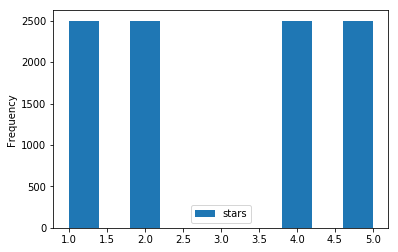

In [21]:
new_data.plot.hist()

In [24]:
new_data.to_csv('/Users/jd/OneDrive/Carnegie Mellon/Materias/Machine Learning/Project/new_data.csv')

## BASELINE MODEL

The baseline model takes a list of good and bad words and classify the comments based on the numbers of good vs the number of bad words in each comment. For example, if a comment has 20 'good' words and 15 'bad' words, it is classified as a good comment.

For testing accuracy, we are taking bad comments as comments with one and two stars and good comments those with four and five stars.

In [16]:
import pandas as pd

In [23]:
data = pd.read_csv('new_data.csv')

In [3]:
len(data)

10000

In [4]:
data = data.reset_index()


In [40]:
data = data.filter(items=['stars','text'])

In [41]:
data.tail()

,stars,text
4465,2,i was with family on the mystere package. thi...
8302,5,when the schatzi said he was taking me to hofb...
6736,4,had the jameson ribs and fries. both were awes...
8518,5,absolutely unbelievable venues! the shear numb...
2113,1,my husband and i were very happy when we found...


In [7]:
negative = pd.read_csv('./Words_classifier/lexicon/negative-wordscopy.txt', encoding="ISO-8859-1", header = None)
positive = pd.read_csv('./Words_classifier/lexicon/positive-wordscopy.txt', encoding="ISO-8859-1", header = None)

In [42]:
data = data.sample(frac=1)
data.head()

,stars,text
461,1,"i was somewhat excited when the store says ""ma..."
1412,1,not one employee seemed like they wanted to be...
5826,4,my friends have been raving about bellybusters...
4656,2,this place continues to go downhill. service i...
6394,4,wasn't too excited to try this place but was p...


In [43]:
for i in range(len(data)):
    data.iloc[i,1] = data.iloc[i,1].lower()

In [44]:
data['prediction'] = -1

In [45]:
data.head()

,stars,text,prediction
461,1,"i was somewhat excited when the store says ""ma...",-1
1412,1,not one employee seemed like they wanted to be...,-1
5826,4,my friends have been raving about bellybusters...,-1
4656,2,this place continues to go downhill. service i...,-1
6394,4,wasn't too excited to try this place but was p...,-1


In [53]:
import time
start_time = time.time()
for i in range(len(data)):
    #print(i)
    if sum(data.iloc[i,1].count(x) for x in negative[0]) > sum(data.iloc[i,1].count(x) for x in positive[0]):
        data.iloc[i,2] = 0
    elif sum(data.iloc[i,1].count(x) for x in negative[0]) < sum(data.iloc[i,1].count(x) for x in positive[0]):
        data.iloc[i,2] = 1

print(time.time()-start_time)

1858.4459221363068


In [54]:
data['sentiment'] = 0

In [63]:
for i in range(len(data)):
    if data.iloc[i,0] == 1 or data.iloc[i,0] == 2:
        data.iloc[i,3] = 0
    else:
        data.iloc[i,3] = 1

In [64]:
data.head(20)

,stars,text,prediction,sentiment
461,1,"i was somewhat excited when the store says ""ma...",0,0
1412,1,not one employee seemed like they wanted to be...,-1,0
5826,4,my friends have been raving about bellybusters...,1,1
4656,2,this place continues to go downhill. service i...,0,0
6394,4,wasn't too excited to try this place but was p...,1,1
7129,4,another hipster coffee shop - cute atmosphere ...,1,1
3678,2,"for $8.99 a bound for salad, i would expect th...",0,0
942,1,i am new to the area and visited this cvs for ...,0,0
8756,5,this is easily one of the best meals i have ev...,1,1
5363,4,good place if your trying to eat on the strip ...,1,1


Neutral comments

In [65]:
data_not_classified = data[data['prediction']==-1]
len(data_not_classified)

690

In [84]:
data_not_classified['sentiment'].describe()

count    690.000000
mean       0.473913
std        0.499681
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: sentiment, dtype: float64

Accuracy over all the sample

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(data['sentiment'], data['prediction'])

0.7286

Accuracy over only non-neutral

In [67]:
data_classified = data[data['prediction']!=-1]

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(data_classified['sentiment'], data_classified['prediction'])

0.7825993555316864

In [74]:
two_and_four = []
for i in range(len(data)):
    if data.iloc[i,0] == 2 or data.iloc[i,0] == 4:
        two_and_four.append(data.iloc[i,:])


Accuracy of data with only reviews of two stars and four stars:

In [82]:
accuracy_score(pd.DataFrame(two_and_four)['sentiment'], pd.DataFrame(two_and_four)['prediction'])

0.6614

Accuracy of data with only reviews of one stars and five stars:

In [81]:
data_one_five = data.drop(pd.DataFrame(two_and_four).index)

Taking non classified as negative comments:

In [100]:
data.loc[data['prediction']==-1,'prediction']=0

In [103]:
accuracy_score(data['sentiment'], data['prediction'])

0.7649

In [110]:
from sklearn.metrics import confusion_matrix

confusion_matrix(data['sentiment'], data['prediction'])


array([[3858, 1142],
       [1209, 3791]])

In [106]:
data.to_csv('/Users/jd/OneDrive/Carnegie Mellon/Materias/Machine Learning/Project/Base_classification.csv')

In [111]:
sum(data['prediction'])

4933

In [130]:
sum([all(tup) for tup in zip(data['prediction']==1, data['sentiment']==0)])

1142